In [90]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.rc('text', usetex=False)
plt.rc('font', family='serif')

import pandas as pd
import numpy as np
fpp_all = pd.read_csv('fpp_final_table.csv', index_col=0)

##temporary hack
#fpp_all['pr_eb_Px2'] = fpp_all['pr_eb']
#fpp_all['pr_heb_Px2'] = fpp_all['pr_heb']
#fpp_all['pr_beb_Px2'] = fpp_all['pr_beb']

fpp_all.count()

koi.1                    7470
rprs                     7202
secthresh                7202
maxrad                   7202
pr_heb                   7026
pr_heb_Px2               7026
pr_eb                    7026
pr_eb_Px2                7026
pr_beb                   7026
pr_beb_Px2               7026
L_tot                    7049
fp                       7049
FPP                      7026
kepid                    7470
period                   7470
rp                       7128
disposition              7470
prob_ontarget            6790
pos_prob_score           7470
not_transitlike          7470
significant_secondary    7470
centroid_offset          7470
ephem_match              7470
MES                      7470
exception                 421
has_ttv                  7268
n_cands                  7470
dtype: int64

In [2]:
fpp_all.query('0.01 < rprs < 0.1 and disposition=="CANDIDATE" and L_tot > 1e-3').sort('pr_eb_Px2', ascending=False)[['rprs','period','L_tot','pr_eb_Px2']].head(10)

/u/tdm/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,rprs,period,L_tot,pr_eb_Px2
koi,,,,
K05157.01,0.018,0.782046,0.940000,1.000
K03156.01,0.029,0.761122,48.090000,0.830
K02725.01,0.083,0.587471,0.003803,0.800
K00684.01,0.039,4.034915,4.673000,0.719
K02050.02,0.018,3.177999,11.750000,0.379
K00554.01,0.073,3.658494,0.510200,0.368
K03813.01,0.055,4.859199,1.807000,0.339
K00103.01,0.027,14.910942,0.470600,0.307
K04193.01,0.036,94.176898,0.191500,0.282


In [91]:
# This is the Gaidos et al "enigmatic" candidate.
fpp_all.ix['K06705.01']

koi.1                    K06705.01
rprs                         0.034
secthresh                       30
maxrad                         3.6
pr_heb                           0
pr_heb_Px2               7.85e-127
pr_eb                            0
pr_eb_Px2                 6.57e-60
pr_beb                   4.96e-133
pr_beb_Px2                       1
L_tot                     1.92e-20
fp                            0.17
FPP                              1
kepid                      6423922
period                    0.995144
rp                         1.73884
disposition              CANDIDATE
prob_ontarget                    1
pos_prob_score                0.18
not_transitlike              False
significant_secondary        False
centroid_offset              False
ephem_match                  False
MES                         14.343
exception                      NaN
has_ttv                      False
n_cands                          1
Name: K06705.01, dtype: object

In [92]:
fpp_all.groupby('exception').count()

,koi.1,rprs,secthresh,maxrad,pr_heb,pr_heb_Px2,pr_eb,pr_eb_Px2,pr_beb,pr_beb_Px2,...,disposition,prob_ontarget,pos_prob_score,not_transitlike,significant_secondary,centroid_offset,ephem_match,MES,has_ttv,n_cands
exception,,,,,,,,,,,,,,,,,,,,,
AllWithinRocheError,39,39,39,39,0,0,0,0,0,0,...,39,31,39,39,39,39,39,39,39,39
BadPhotometryError,4,3,3,3,0,0,0,0,0,0,...,4,4,4,4,4,4,4,4,3,4
BadRoweFitError,233,0,0,0,0,0,0,0,0,0,...,233,185,233,233,233,233,233,233,125,233
EmptyPhotometryError,22,0,0,0,0,0,0,0,0,0,...,22,20,22,22,22,22,22,22,0,22
IOError,2,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,0,2
MCMCError,36,35,35,35,0,0,0,0,0,0,...,36,32,36,36,36,36,36,36,25,36
MissingStellarError,74,74,74,74,0,0,0,0,0,0,...,74,36,74,74,74,74,74,74,73,74
NoFitError,2,1,1,1,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2
NoWeakSecondaryError,8,0,0,0,0,0,0,0,0,0,...,8,6,8,8,8,8,8,8,7,8


In [93]:
other = ['2015-08-13', 'KeyError', 'TypeError', 'ValueError', 'ZeroDivisionError','IOError']
fpp_all.query("exception in ['2015-08-13', 'KeyError', 'TypeError', 'ValueError', 'ZeroDivisionError','IOError']")['disposition']

koi
K00371.02    FALSE POSITIVE
K02433.06         CANDIDATE
K03528.01         CANDIDATE
Name: disposition, dtype: object

In [94]:
fpp_all.query("exception in ['EmptyPhotometryError','BadPhotometryError']").groupby('disposition').count()

,koi.1,rprs,secthresh,maxrad,pr_heb,pr_heb_Px2,pr_eb,pr_eb_Px2,pr_beb,pr_beb_Px2,...,prob_ontarget,pos_prob_score,not_transitlike,significant_secondary,centroid_offset,ephem_match,MES,exception,has_ttv,n_cands
disposition,,,,,,,,,,,,,,,,,,,,,
CANDIDATE,13,3,3,3,0,0,0,0,0,0,...,12,13,13,13,13,13,13,13,3,13
FALSE POSITIVE,13,0,0,0,0,0,0,0,0,0,...,12,13,13,13,13,13,13,13,0,13


In [5]:
np.savetxt('empty_photometry.txt',fpp_all.query('exception == "EmptyPhotometryError"')['koi.1'], fmt='%s')
np.savetxt('missing_koi.txt',fpp_all.query('exception == "MissingKOIError"')['koi.1'], fmt='%s')


In [7]:
runtime_errors = ["ZeroDivisionError", "ValueError", "MCMCError", "EmptyPopulationError", "AllWithinRocheError"]
len(fpp_all.query('FPP >=0 or exception in ["ZeroDivisionError", "ValueError", "MCMCError", "EmptyPopulationError", "AllWithinRocheError"]'))

7062

In [95]:
fpp_all.query('L_tot < 1e-2 and L_tot > 1e-3 and FPP < 0.01 and disposition == "CANDIDATE" ' +\
              'and prob_ontarget > 0.9 and pos_prob_score > 0.3 and MES >= 10')

,koi.1,rprs,secthresh,maxrad,pr_heb,pr_heb_Px2,pr_eb,pr_eb_Px2,pr_beb,pr_beb_Px2,...,prob_ontarget,pos_prob_score,not_transitlike,significant_secondary,centroid_offset,ephem_match,MES,exception,has_ttv,n_cands
koi,,,,,,,,,,,,,,,,,,,,,
K00289.01,K00289.01,0.020,31,0.51,1.610000e-38,5.440000e-15,1.020000e-13,4.880000e-04,3.540000e-60,1.020000e-44,...,1.00,1.00,False,False,False,False,76.267290,NaN,False,2
K01175.02,K01175.02,0.010,41,4.20,1.460000e-196,3.150000e-28,4.050000e-81,6.510000e-43,1.030000e-78,6.200000e-77,...,1.00,0.50,False,False,False,False,13.743307,NaN,False,2
K01316.01,K01316.01,0.008,12,0.69,1.440000e-43,3.400000e-09,1.030000e-53,7.380000e-32,1.060000e-268,9.240000e-216,...,1.00,1.00,False,False,False,False,20.358790,NaN,False,1
K02009.01,K02009.01,0.022,92,1.02,2.170000e-35,1.790000e-35,1.200000e-16,8.170000e-21,2.720000e-80,8.770000e-72,...,1.00,0.99,False,False,False,False,30.132612,NaN,False,1
K02914.01,K02914.01,0.009,49,1.20,2.140000e-80,1.950000e-52,4.280000e-62,9.970000e-45,1.910000e-313,7.600000e-268,...,0.99,0.78,False,False,False,False,14.865933,NaN,False,1


In [4]:
df = fpp_all.query('exception == "MissingKOIError" or exception == "EmptyPhotometryError"')
df.groupby('disposition').count()

,koi.1,rprs,secthresh,maxrad,pr_heb,pr_eb,pr_beb,L_tot,fp,FPP,kepid,period,rp,prob_ontarget,pos_prob_score,not_transitlike,significant_secondary,centroid_offset,ephem_match,exception
disposition,,,,,,,,,,,,,,,,,,,,
CANDIDATE,13,0,0,0,0,0,0,0,0,0,13,13,0,9,11,13,13,13,13,13
FALSE POSITIVE,34,0,0,0,0,0,0,0,0,0,34,34,0,14,15,34,34,34,34,34


In [96]:
#4115.01 -- variable star?  rprs too big

fpp_all.ix['K07016.01']

koi.1                    K07016.01
rprs                         0.013
secthresh                      120
maxrad                        1.26
pr_heb                    1.24e-07
pr_heb_Px2                3.32e-08
pr_eb                      0.00018
pr_eb_Px2                 1.68e-06
pr_beb                     0.00115
pr_beb_Px2                8.92e-05
L_tot                        1.632
fp                           0.162
FPP                        0.00142
kepid                      8311864
period                     384.843
rp                         1.50265
disposition              CONFIRMED
prob_ontarget                 0.98
pos_prob_score                0.94
not_transitlike              False
significant_secondary        False
centroid_offset              False
ephem_match                  False
MES                         9.6949
exception                      NaN
has_ttv                      False
n_cands                          1
Name: K07016.01, dtype: object

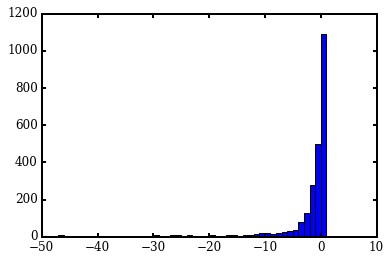

In [97]:
ok = fpp_all['L_tot'] > 0
plt.hist(np.log10(fpp_all[ok]['L_tot']), bins=range(-50,2));

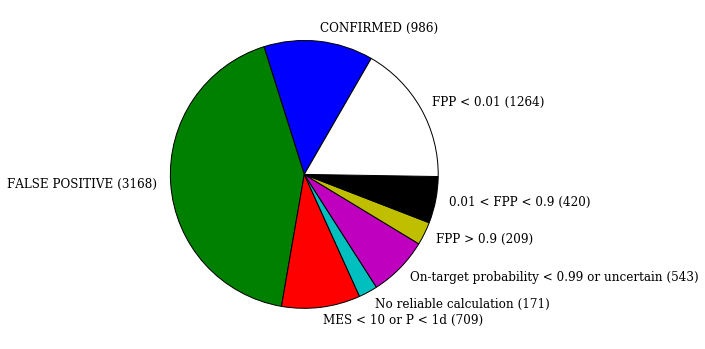

In [ ]:
prob_score_thresh = 0.3

confirmed = fpp_all['disposition'] == 'CONFIRMED'
known_fp = fpp_all['disposition'] == 'FALSE POSITIVE'
candidate = fpp_all['disposition'] == 'CANDIDATE'
low_fpp = fpp_all['FPP'] < 0.01
hi_fpp = fpp_all['FPP'] > 0.9
med_fpp = (fpp_all['FPP'] >= 0.01) & (fpp_all['FPP'] <=0.9)
snr_low = fpp_all['MES'] < 10
snr_good = fpp_all['MES'] >= 10
on_target = (fpp_all['prob_ontarget'] >= 0.99) & (fpp_all['pos_prob_score'] >= prob_score_thresh)
off_target = (fpp_all['prob_ontarget'] < 0.99) & (fpp_all['pos_prob_score'] >= prob_score_thresh)
target_ambiguous = ((fpp_all['pos_prob_score'] < prob_score_thresh) | 
                    np.isnan(fpp_all['pos_prob_score']) | 
                    np.isnan(fpp_all['prob_ontarget']))
not_crazy = fpp_all['L_tot'] > 1e-3
crazy = fpp_all['L_tot'] <= 1e-3
short_period = fpp_all['period'] < 1.
period_ok = fpp_all['period'] >= 1.

fpp_calculated = np.isfinite(fpp_all['FPP']) 
d = fpp_all[fpp_calculated]

#reliable = (confirmed | candidate) & on_target & not_crazy
#print(sum(reliable))
#print(sum(reliable & low_fpp))
#print(sum(candidate & on_target & not_crazy & low_fpp))
#print(sum(confirmed))
#print(sum(candidate & high_fpp))
#print(sum(confirmed & high_fpp))

newfp = (candidate & fpp_calculated & not_crazy & on_target & hi_fpp & snr_good & period_ok)
newmed = (candidate & fpp_calculated & not_crazy & on_target & med_fpp & snr_good & period_ok)
newval = (candidate & fpp_calculated & not_crazy & on_target & low_fpp & snr_good & period_ok)

categories = [ confirmed, known_fp, (candidate & (snr_low | short_period)),
              ((candidate & ~fpp_calculated & snr_good & period_ok) | 
               (candidate & fpp_calculated & crazy & snr_good & period_ok)),
              ((candidate & fpp_calculated & not_crazy & target_ambiguous & snr_good & period_ok) | 
               (candidate & fpp_calculated & not_crazy & off_target & snr_good & period_ok)),
              newfp, newmed, newval]

labels = ['CONFIRMED ({})'.format(categories[0].sum()),
          'FALSE POSITIVE ({})'.format(categories[1].sum()),
          'MES < 10 or P < 1d ({})'.format(categories[2].sum()),
          'No reliable calculation ({})'.format(categories[3].sum()),
          'On-target probability < 0.99 or uncertain ({})'.format(categories[4].sum()),
          #'On-target probability < 0.99 ({})'.format(categories[5].sum()), 
          'FPP > 0.9 ({})'.format(categories[5].sum()), 
          '0.01 < FPP < 0.9 ({})'.format(categories[6].sum()), 
          'FPP < 0.01 ({})'.format(categories[7].sum())]

needmore = categories[3] | categories[4] | categories[5] 

sums = np.array([c.sum() for c in categories])
fracs = sums / float(sums.sum()) * 100

fig, ax = plt.subplots(1,1, figsize=(6,6))
ax.pie(fracs, labels=labels, startangle=60);

plt.savefig('document/figures/fpp_pie.pdf', bbox_inches='tight')
fpp_all[newval].to_csv('newly_validated.csv')

In [14]:
sum((candidate | confirmed) & on_target & not_crazy & snr_good)

2838

In [15]:
sum(hi_fpp)

2006

In [16]:
sum(candidate & hi_fpp)

368

In [17]:
sum(low_fpp)

2827

In [18]:
len(fpp_all[target_ambiguous].query('MES > 10 and period > 3 and FPP < 0.01'))

184

In [19]:
len(fpp_all[newval].query('MES > 10 and period > 3'))

1065

In [99]:
#%%file write_fpptable_tex.py
#!/usr/bin/env python

import pandas as pd
import numpy as np

validated = ((candidate | confirmed) & fpp_calculated & not_crazy & 
             on_target & low_fpp & snr_good & period_ok)

def write_fpptable_tex(nrows=25, istart=3000):
    fpp_all = pd.read_csv('fpp_final_table.csv', index_col=0)
    
    columns = ['koi.1', 'period', 'has_ttv', 'rp', 'MES', 'secthresh',
              'maxrad', 
              'pr_eb', 'pr_heb', 'pr_beb', 'L_tot',
              'fp', 
              'prob_ontarget','pos_prob_score', 
               'disposition', 'FPP',
              'exception', 'validated']

    # Failure classes:
    #  1:  No MCMC modeling from JRowe (MissingKOIError, EmptyPhotometryError)
    #  2:  Bad MCMC model from JRowe (BadRoweFitError)
    #  3:  No stellar params from Huber table (MissingStellarError)
    #  4:  No weak secondary data (NoWeakSecondaryError)
    #  5:  MCMC trapezoid fit did not converge (MCMCError)
    #  6:  Period too short for implied star (AllWithinRocheError)
    #  7:  Other (EmptyPopulationError, ValueError, ZeroDivisionError, [anything else])
    exceptions = {'AllWithinRocheError': 6,
                 'BadRoweFitError': 2,
                 'EmptyPhotometryError': 1,
                 'EmptyPopulationError': 7,
                 'MCMCError': 5,
                  'IOError':1,
                 'MissingKOIError': 1,
                 'MissingStellarError': 3,
                 'NoWeakSecondaryError': 4,
                 'ValueError': 7,
                 'ZeroDivisionError': 7}
    
    formats = {'koi.1':'{:s}',
                'disposition':'{:s}',
                'period':'{:.3f}',
                'rp':'{:.2f}',
                'MES':'{:.1f}',
                'secthresh':'{:.0f}',
                'maxrad':'{:.2f}',
                'pr_heb':'{:.2g}',
                'pr_eb':'{:.2g}',
                'pr_beb':'{:.2g}',
                'pr_heb':'{:.2g}',
                'L_tot':'{:.2g}',
                'fp':'{:.3f}',
                 'FPP':'{:.2g}',
             'kepid':'{:.0f}',
             'prob_ontarget':'{:.2f}',
             'pos_prob_score':'{:.2f}',
             'exception':'{}',
             'has_ttv':'{}', 
               'validated':'{}'
               }

    
    fout = open('document/table_fpp.tex','w')
    fout.write("""
\\begin{deluxetable*}{cccccccccccccccccc}
\\tablewidth{0pt}
\\tabletypesize{\scriptsize}
\\tablecaption{False Positive Probability Results
\\tablabel{fpp}}
\\tablehead{\\colhead{KOI} &
    \\colhead{$P$} &
    \\colhead{TTVs?} &
    \\colhead{$R_p$} &
    \\colhead{SNR} &
    \\colhead{$\\delta_{\\rm sec}$\\tablenotemark{a}} &
    \\colhead{$r_{\\rm excl}$\\tablenotemark{b}} &
    \\colhead{Pr$_{\\rm EB}$\\tablenotemark{c}} &
    \\colhead{Pr$_{\\rm HEB}$\\tablenotemark{c}} &
    \\colhead{Pr$_{\\rm BEB}$\\tablenotemark{c}} &
    \\colhead{$L_{\\rm tot}$\\tablenotemark{d}}&
    \\colhead{$f_p$\\tablenotemark{e}} &
    \\colhead{$p_{\\rm pos}$\\tablenotemark{f}} &
    \\colhead{$s_{\\rm pos}$\\tablenotemark{g}} &
    \\colhead{Disp.\\tablenotemark{h}} &
    \\colhead{FPP\\tablenotemark{i}} &
    \\colhead{Failure\\tablenotemark{j}} &
    \\colhead{Validated?} \\\\
    \\colhead{} &
    \\colhead{(d)} &
    \\colhead{} &
    \\colhead{($R_\\oplus$)} &
    \\colhead{} &
    \\colhead{(ppm)} &
    \\colhead{(\\arcsec)} &
    \\colhead{} &
    \\colhead{} &
    \\colhead{} &
    \\colhead{} &
    \\colhead{} &
    \\colhead{} &
    \\colhead{} &
    \\colhead{} &
    \\colhead{} &
    \\colhead{} &
    \\colhead{}
    }
\\startdata
"""
        )
    for i in range(istart, istart+nrows):
        line = ''
        for c in columns:
            if c=='validated':
                val = 'Yes' if validated[i] else 'No'
            else:
                val = fpp_all.iloc[i][c]
            
            try:
                if np.isnan(val):
                    val = '--'
            except:
                pass
                
            if c=='exception':
                if val != '--':
                    try:
                        val = exceptions[val]
                    except KeyError:
                        val = 7
                
            elif c=='disposition':
                if val=='CANDIDATE':
                    val = 'CA'
                elif val=='FALSE POSITIVE':
                    val = 'FP'
                elif val=='CONFIRMED':
                    val = 'PL'
            
            try:
                if c not in ['Ltot', 'has_ttv']:
                    if val < 1e-5:
                        val = 1e-5
            except:
                pass

            try:
                line += '{} & '.format(formats[c]).format(val)
            except ValueError:
                line += '{} & '.format(val)
                
                
        line = line[:-2]
        if i != istart+nrows-1:
            line += '\\\\ '
        line += '\n'
        fout.write(line)
    fout.write("""\\enddata
\\tablecomments{A portion of this table is shown for form and content.  
                The full table will be available online.}
\\tablenotetext{a}{Maximum secondary eclipse depth allowed.}
\\tablenotetext{b}{``Exclusion radius'' inside of which false positive scenarios are allowed.}
\\tablenotetext{c}{Probabilities for different astrophysical false positive scenarios: 
                unblended eclipsing binary (EB), hierarchical eclipsing binary (HEB),
                and background/foreground eclipsing binary (BEB).}
\\tablenotetext{d}{Sum of likelihood $\\times$ prior for all models.  A very low
                    value here indicates that no model gives a good fit, so a low
                    FPP should be interpreted cautiously.}
\\tablenotetext{e}{Assumed ``specific planet occurrence rate'' for this planet.}
\\tablenotetext{f}{Probability of signal to be on target star, according to Bryson et al.~(2015, in prep).}
\\tablenotetext{g}{Positional probability score, from Bryson et al. (2015).}
\\tablenotetext{h}{Exoplanet Archive disposition: false positive (FP), candidate (CA), or confirmed (PL).}
\\tablenotetext{i}{False positive probability.}
\\tablenotetext{j}{Reason for failure: (1) No MCMC modeling available from \\citet{Rowe:2015};
    (2)  Unphysical MCMC fit from \\citet{Rowe:2015};
    (3)  No stellar parameters available from \citet{Huber:2014};
    (4)  No weak secondary data available;
    (5)  MCMC trapezoid fit did not converge;
    (6)  Period too short for implied star (orbit within star);
    (7)  Other unspecified \\vespa\\ error.}
\\end{deluxetable*}
"""            )
    fout.close()
    
if __name__=='__main__':
    write_fpptable_tex()

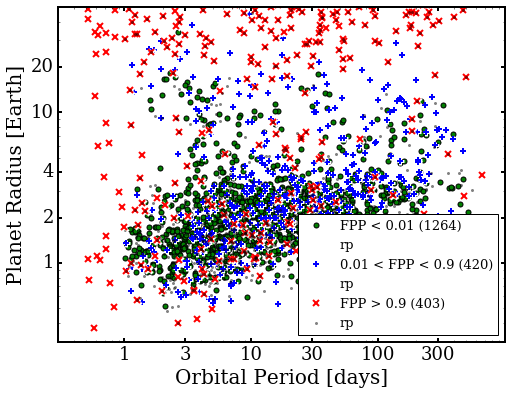

In [100]:
from matplotlib.ticker import ScalarFormatter

fig, ax = plt.subplots(1,1, figsize=(8,6))

fps = candidate & hi_fpp

ax.plot(fpp_all[newval]['period'], fpp_all[newval]['rp'], 'go', ms=5, mew=1, 
        label='FPP < 0.01 ({})'.format(np.sum(newval), mec='LawnGreen'))

ax.plot(fpp_all[newmed]['period'], fpp_all[newmed]['rp'], 'w+', ms=7, mew=3)
ax.plot(fpp_all[newmed]['period'], fpp_all[newmed]['rp'], 'b+', ms=6, mew=2,
       label='0.01 < FPP < 0.9 ({})'.format(np.sum(newmed)))

ax.plot(fpp_all[fps]['period'], fpp_all[fps]['rp'], 'wx', ms=7, mew=3)
ax.plot(fpp_all[fps]['period'], fpp_all[fps]['rp'], 'rx', ms=6, mew=2,
       label='FPP > 0.9 ({})'.format(np.sum(fps)))

ax.plot(fpp_all[needmore]['period'], fpp_all[needmore]['rp'], 'ko', ms=1, alpha=0.5)

ax.set_ylim(ymin=0.3, ymax=50)
ax.set_xlim(xmin=0.3, xmax=1000)
ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xticks([1,3,10,30,100,300])
ax.set_yticks([1,2,4,10,20])

ax.tick_params(axis='x', labelsize=18)
ax.tick_params(axis='y', labelsize=18)

ax.set_ylabel('Planet Radius [Earth]', fontsize=20)
ax.set_xlabel('Orbital Period [days]', fontsize=20)

for axis in [ax.xaxis, ax.yaxis]:
    axis.set_major_formatter(ScalarFormatter())

ax.legend(loc='lower right', numpoints=1, fontsize=13)

plt.savefig('document/figures/RP_cand.pdf', bbox_inches='tight')

In [45]:
fpp_all.query('period < 1 and rp > 2 and rp < 7 and FPP < 0.01')[['disposition', 'period','rp','prob_ontarget']]

,disposition,period,rp,prob_ontarget
koi,,,,
K01428.01,CANDIDATE,0.927860,2.009166,1.000000e+00
K03794.01,CANDIDATE,0.653554,5.680842,1.000000e+00
K04042.01,FALSE POSITIVE,0.723568,2.401403,9.700000e-18
K06527.01,FALSE POSITIVE,0.530800,3.629039,1.000000e+00
K06918.01,CANDIDATE,0.902404,6.215602,9.400000e-01
K07213.01,FALSE POSITIVE,0.758824,2.441750,0.000000e+00


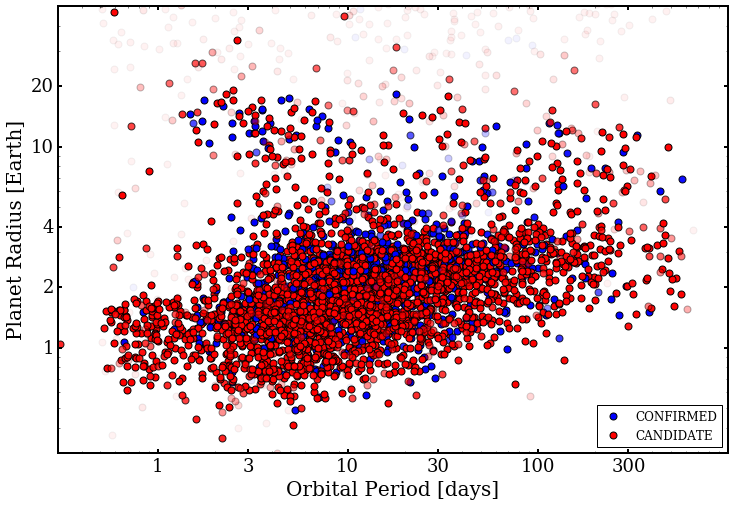

In [101]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
import matplotlib.lines as mlines

fig, ax = plt.subplots(1,1, figsize=(12,8))

for _,s in fpp_all.iterrows():
    if s.disposition=='FALSE POSITIVE':
        continue
    elif s.disposition=='CONFIRMED':
        alpha = 1.
        col='b'
    else:
        if np.isnan(s.FPP):
            continue
        col = 'r'
    alpha = 0.95*(1 - s.FPP) + 0.05
    if not np.isfinite(alpha):
        continue # don't break PDF
    #if s.MES < 10 or s.period < 1:
    #    col = 'r'
    ax.plot(s.period, s.rp, color=col, marker='o', ms=7, mew=1, alpha=alpha)

ax.set_ylim(ymin=0.3, ymax=50)
ax.set_xlim(xmin=0.3, xmax=1000)
ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xticks([1,3,10,30,100,300])
ax.set_yticks([1,2,4,10,20])

ax.tick_params(axis='x', labelsize=18)
ax.tick_params(axis='y', labelsize=18)

ax.set_ylabel('Planet Radius [Earth]', fontsize=20)
ax.set_xlabel('Orbital Period [days]', fontsize=20)

ax.legend(handles=[mlines.Line2D([],[], color='b', marker='o', ms=7, ls='none', mew=1),
                   mlines.Line2D([],[], color='r', marker='o', ms=7, ls='none', mew=1)], 
                  labels=['CONFIRMED','CANDIDATE'], numpoints=1, loc='lower right')

for axis in [ax.xaxis, ax.yaxis]:
    axis.set_major_formatter(ScalarFormatter())

plt.savefig('document/figures/fppalpha.pdf')

In [102]:
import numpy as np
import matplotlib.pyplot as plt

def fpp_summaryplot(data=fpp_calculated,fig=None,symbol='o',ms=1,color='k',
                    markrs=[1,1.5,2,2.5,3,4,10],nbins=15,alpha=0.5,
                    title=None,hlineval=0.01,labelpos=(0.8,0.08),
                    summarylabel=True,erasedata=None,titlefontsize=20,
                    titlexy=(0.25,0.85), 
                    subquery=None, subcolor='b', **kwargs):
    
    data = data.sort('rp')
    inds = np.arange(len(data))
    data.index = inds
    
    
    ypts = data['FPP'].clip(1e-4,1)
    xpts = np.arange(len(data))
    plt.semilogy(ypts,symbol,ms=ms,color=color,alpha=alpha,**kwargs)

    if subquery is not None:
        sub = data.query(subquery)
        suby = sub['FPP'].clip(1e-4, 1)
        subx = sub.index
    
    if erasedata is not None:
        plt.semilogy(ypts,symbol,ms=ms,color=color,alpha=alpha,**kwargs)
        if subquery is not None:
            plt.semilogy(subx, suby, ms=ms+1, color=subcolor,
                        mec=subcolor)
        
    plt.ylim(ymin=8e-5)
    xmax = inds.max()+1
    plt.xlim(xmax=xmax)
    plt.xticks([])

    ax = plt.gca()

    plt.axhline(hlineval,color='k',lw=2)

    for r in markrs:
        i = np.argmin(np.absolute(data['rp'][inds]-r))
        ax.axvline(i,color='k',lw=3,ls=':')
        ax.annotate(r'%.1f' % r,xy=(float(i)/xmax,-0.05),xycoords='axes fraction',ha='center',
                    annotation_clip=False,fontsize=14)
        

    if nbins is not None:
        N = len(ypts)
        binsize = N/nbins
        xbins = []
        ybins = []
        yerrs = []
        for i in range(nbins):
            xbins.append((xpts[i*binsize:(i+1)*binsize]).mean())
            ybins.append(np.median(ypts[i*binsize:(i+1)*binsize]))
            yerrs.append((ypts[i*binsize:(i+1)*binsize]).std())
        #plt.errorbar(xbins,ybins,yerr=yerrs,color=linecolor,fmt='o',ms=5)
        plt.plot(xbins,ybins,'wo',ms=15)
        plt.plot(xbins,ybins,'ko',ms=13)
        plt.plot(xbins,ybins,'ro',ms=12)

    plt.xlabel('Planet Radius [$R_\oplus$]',labelpad=30, fontsize=20)
    plt.ylabel('False Positive Probability', fontsize=20)
    plt.ylim(ymax=1.1)
    
    if title is not None:
        plt.annotate(title,xy=titlexy,xycoords='axes fraction',
                     fontsize=titlefontsize,
                     bbox=dict(boxstyle='round',fc='w',lw=2),ha='center')

    if summarylabel:
        N = float(len(data))
        gt_50pct = (data['FPP'] > 0.5).sum()
        lt_1pct = (data['FPP'] < 0.01).sum()
        #lt_03pct = (data['FPP'] < 0.003).sum()
        plt.annotate('%i/%i FPP > 50%%\n%i/%i FPP < 1%%' % 
                     (gt_50pct,N,lt_1pct,N),xy=labelpos,xycoords='axes fraction',
                     fontsize=15,bbox=dict(boxstyle='round',fc='w',lw=2),ha='center')


/u/tdm/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:11: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


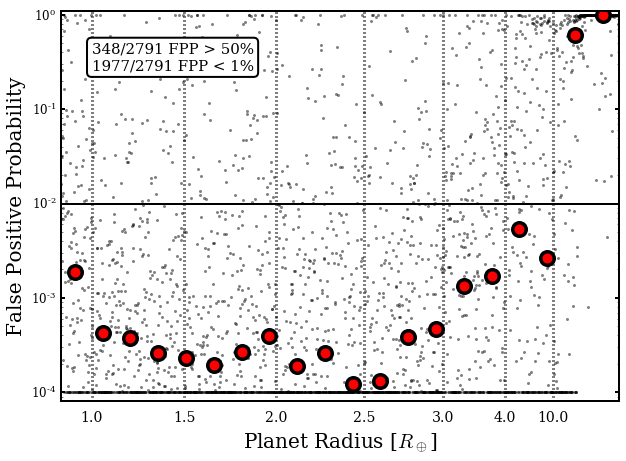

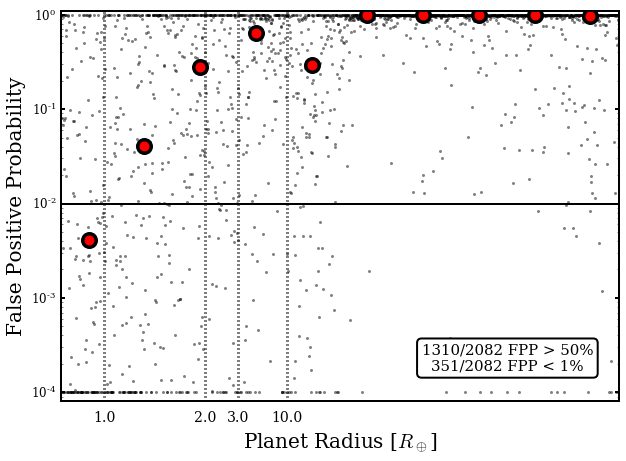

In [103]:
%matplotlib inline
plt.figure(figsize=(10,7))
d_reliable = d.query('disposition != "FALSE POSITIVE" and pos_prob_score > {} and L_tot > 1e-3 and prob_ontarget > 0.99 and MES > 10'.format(prob_score_thresh))
fpp_summaryplot(d_reliable,
               nbins=20, labelpos=(0.2,0.85));
plt.savefig('document/figures/fpp_summary_all.pdf')
plt.figure(figsize=(10,7))
fpp_summaryplot(d.query('(disposition == "FALSE POSITIVE") and L_tot > 1e-3 and MES>10'), 
               nbins=10, markrs=[1,2,3,10], subquery='prob_ontarget > 0.99');
plt.savefig('document/figures/fpp_summary_fp.pdf')

In [104]:
labels = ['all', 'singles','multis',
         '$R_p > 15\,R_\oplus$',
         '$10\,R_\oplus < R_p < 15\,R_\oplus$',
         '$4\,R_\oplus < R_p < 10\,R_\oplus$',
         '$2\,R_\oplus < R_p < 4\,R_\oplus$',
         '$R_p < 2\,R_\oplus$']
queries = ['rp>0','n_cands==1',
          'n_cands>1', 'rp >=15',
          'rp >= 10 and rp < 15',
          'rp >= 4 and rp < 10',
          'rp >= 2 and rp < 4',
          'rp < 2']

outfile = open('document/table_meanfpp.tex','w')
outfile.write(r'\begin{deluxetable}{cccc}' + '\n')
outfile.write(r'\tabletypesize{\scriptsize}' + '\n')
outfile.write(r'\tablecaption{Mean FPPs of candidate KOIs with reliable \vespa\ calculations' + '\n')
outfile.write(r'\tablabel{meanFPP} }' + '\n')
outfile.write(r'\tablehead{\colhead{Selection} & \colhead{Number} & \colhead{Mean FPP} ' + '\n')
outfile.write(r'\startdata' + '\n')
for l,q in zip(labels, queries):
    d = d_reliable.query(q)
    outfile.write('{} & {} & {:.3f} '.format(l, len(d), d.FPP.mean()))#, d.FPP.median()))
    if l!=labels[-1]:
        outfile.write('\\\\\n')
    else:
        outfile.write('\n')
outfile.write(r'\enddata' + '\n')
outfile.write(r'\end{deluxetable}' + '\n')
outfile.close()
    #print('all & {} & {:.3f} \\\\'.format(len(d_reliable),d_reliable.FPP.mean()))
#print('singles & {} & {:.3f} \\\\'.format(len(d_reliable.query('n_cands==1')),
#                                          d_reliable.query('n_cands==1').FPP.mean()))
#print('multis & {} & {:.3f} \\\\'.format(len(d_reliable.query('n_cands>1')),
#                                         d_reliable.query('n_cands>1').FPP.mean()))
#print('$R_p > 10\,R_\oplus$ & {} & {:.3f} \\\\ '.format(len(d_reliable.query('rp >= 10')),
#                                                        d_reliable.query('rp >= 10').FPP.mean()))
#print('$4\,R_\oplus < R_p < 10\,R_\oplus$ & {} & {:.3f} \\\\ '.format(len(d_reliable.query('rp > 4 and rp < 10')),
#                                                                      d_reliable.query('rp > 4 and rp < 10').FPP.mean()))
#print('$2\,R_\oplus < R_p < 4\,R_\oplus$ & {} & {:.3f} \\\\ '.format(len(d_reliable.query('rp > 2 and rp < 4')),
#                                                                     d_reliable.query('rp > 2 and rp < 4').FPP.mean()))
#print('$R_p < 2\,R_\oplus$ & {} & {:.3f} '.format(len(d_reliable.query('rp < 2')),
#                                                  d_reliable.query('rp < 2').FPP.mean()))

In [105]:
from keputils import koiutils as ku
from keputils import kicutils as kicu

starprops = pd.read_table('data/starprops_all.txt', delim_whitespace=True)
starprops['koistar'] = starprops['koi'].apply(ku.koistar)

sp = starprops.groupby('koistar').first()

huber_sp = kicu.DATA.ix[ku.DATA.ix[sp['koi'], 'kepid']]

                        
len(starprops), len(sp), len(huber_sp)


(7135, 6102, 6102)

In [77]:
huber_sp.columns

Index([u'kepid', u'tm_designation', u'teff', u'teff_err1', u'teff_err2',
       u'logg', u'logg_err1', u'logg_err2', u'feh', u'feh_err1', u'feh_err2',
       u'mass', u'mass_err1', u'mass_err2', u'radius', u'radius_err1',
       u'radius_err2', u'dens', u'dens_err1', u'dens_err2', u'prov_sec',
       u'kepmag', u'nconfp', u'nkoi', u'ntce', u'datalink_dvr',
       u'st_delivname', u'st_vet_date_str', u'ra', u'ra_str', u'dec',
       u'dec_str', u'st_quarters', u'teff_prov', u'logg_prov', u'feh_prov',
       u'jmag', u'jmag_err', u'hmag', u'hmag_err', u'kmag', u'kmag_err',
       u'dutycycle', u'dataspan', u'mesthres01p5', u'mesthres02p0',
       u'mesthres02p5', u'mesthres03p0', u'mesthres03p5', u'mesthres04p5',
       u'mesthres05p0', u'mesthres06p0', u'mesthres07p5', u'mesthres09p0',
       u'mesthres10p5', u'mesthres12p0', u'mesthres12p5', u'mesthres15p0',
       u'rrmscdpp01p5', u'rrmscdpp02p0', u'rrmscdpp02p5', u'rrmscdpp03p0',
       u'rrmscdpp03p5', u'rrmscdpp04p5', u'rrmscdpp05p

In [78]:
sp.columns

Index([u'koi', u'mass', u'mass_lo', u'mass_hi', u'radius', u'radius_lo',
       u'radius_hi', u'Teff', u'Teff_lo', u'Teff_hi', u'logg', u'logg_lo',
       u'logg_hi', u'feh', u'feh_lo', u'feh_hi', u'age', u'age_lo', u'age_hi',
       u'distance', u'distance_lo', u'distance_hi', u'AV', u'AV_lo', u'AV_hi',
       u'maxAV', u'Teff_prior_mu', u'Teff_prior_sig', u'logg_prior_mu',
       u'logg_prior_sig', u'feh_prior_mu', u'feh_prior_sig'],
      dtype='object')

In [79]:
def valpm(val, lo, hi, fmt=''):
    """Returns LaTeX for val +/- errs
    """
    p_err = '{{{}}}'.format(fmt).format(hi - val)
    m_err = '{{{}}}'.format(fmt).format(val - lo)
    val = '{{{}}}'.format(fmt).format(val)
    return '${{ {} }}^{{ +{} }}_{{ -{} }}$'.format(val, p_err, m_err)

valpm(100.000, 80.124, 120)

'${ 100.0 }^{ +20.0 }_{ -19.876 }$'

In [106]:
#!/usr/bin/env python

import numpy as np
import pandas as pd
from keputils import koiutils as ku
import re

starprops = pd.read_table('data/starprops_all.txt', delim_whitespace=True)
starprops['koistar'] = starprops['koi'].apply(ku.koistar)

sp = starprops.groupby('koistar').first()

def valpm(val, lo, hi, fmt='{}'):
    """Returns LaTeX for val +/- errs
    """
    p_err = '{{{}}}'.format(fmt).format(hi - val)
    m_err = '{{{}}}'.format(fmt).format(val - lo)
    val = '{{{}}}'.format(fmt).format(val)
    return '${{ {} }}^{{ +{} }}_{{ -{} }}$'.format(val, p_err, m_err)

def write_startable_tex(nrows=50, istart=1000):
    columns = ['mass', 'radius', 'Teff',
              'logg', 'feh', 'age', 'distance',
               'AV', 'Teff_prior', 'logg_prior', 'feh_prior']
    
    formats = {'mass':':.2f',
               'radius':':.2f',
               'Teff': ':.0f',
               'logg': ':.2f',
               'feh': ':.2f',
               'age': ':.2f',
               'distance': ':.0f',
               'AV' : ':.2f'}

    
    fout = open('document/table_stars.tex','w')
    fout.write("""
\\begin{deluxetable*}{lccccccccccc}
\\tablewidth{0pt}
\\tabletypesize{\\scriptsize}
\\tablecaption{Stellar Properties
\\tablabel{stars}}
\\tablehead{\\colhead{Star} &
    \\colhead{$M_\\star$} &
    \\colhead{$R_\\star$} &
    \\colhead{$T_{\\rm eff}$} &
    \\colhead{$\\log g$} &
    \\colhead{[Fe/H]} &
    \\colhead{Age} &
    \\colhead{$d$} &
    \\colhead{$A_V$}&
    \\colhead{$\\pi\\left(T_{\\rm eff}\\right)$} &
    \\colhead{$\\pi\\left(\\log g\\right)$} &
    \\colhead{$\\pi\\left({\\rm [Fe/H]}\\right)$} \\\\
    \\colhead{} &
    \\colhead{($M_\odot$)} &
    \\colhead{($R_\odot$)} &
    \\colhead{(K)} &
    \\colhead{(cgs)} &
    \\colhead{(dex)} &
    \\colhead{(Gyr)} &
    \\colhead{(pc)} &
    \\colhead{(mag)} &
    \\colhead{} &
    \\colhead{} &
    \\colhead{} 
    }
\\startdata
"""
        )
    for i in range(istart, istart+nrows):
        k = sp.index[i]
        line = '{} &'.format(k)
        
        for c in columns:
            m = re.search('(\w+)_prior', c)
            if m:
                prop = m.group(1)
                mu,sig = sp.ix[k, ['{}_prior_mu'.format(prop),
                                  '{}_prior_sig'.format(prop)]]
                if np.isnan(mu):
                    val = '--'
                else:
                    val = '({{{0}}}, {{{0}}})'.format(formats[prop]).format(mu,sig)
            
            else:
                val, lo, hi = sp.ix[k, ['{}'.format(c),
                                       '{}_lo'.format(c),
                                       '{}_hi'.format(c)]]
                try:
                    if np.isnan(val):
                        val = '--'
                except:
                    pass
                
                if val != '--':
                    val = valpm(val, lo, hi, formats[c])
                

            line += '{}&'.format(val)                
                
        line = line[:-1]
        if i != istart+nrows-1:
            line += '\\\\ '
        line += '\n'
        fout.write(line)
    fout.write("""\\enddata
\\tablecomments{A portion of this table is shown for form and content.  
                The full table will be available online.}
\\end{deluxetable*}
"""            )
    fout.close()
    
if __name__=='__main__':
    write_startable_tex()    

In [6]:
huber_sp.query('radius > 2').groupby('logg_prov').count()

,kepid,tm_designation,teff,teff_err1,teff_err2,logg,logg_err1,logg_err2,feh,feh_err1,...,rrmscdpp03p5,rrmscdpp04p5,rrmscdpp05p0,rrmscdpp06p0,rrmscdpp07p5,rrmscdpp09p0,rrmscdpp10p5,rrmscdpp12p0,rrmscdpp12p5,rrmscdpp15p0
logg_prov,,,,,,,,,,,,,,,,,,,,,
AST10,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
AST11,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
AST54,12,12,12,12,12,12,12,12,12,12,...,12,12,12,12,12,12,12,12,12,12
AST55,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
AST56,8,8,8,8,8,8,8,8,8,8,...,8,8,8,8,8,8,8,8,8,8
AST8,17,17,17,17,17,17,17,17,17,17,...,17,17,17,17,17,17,17,17,17,17
AST9,30,30,30,30,30,30,30,30,30,30,...,30,30,30,30,30,30,30,30,30,30
KIC0,337,337,337,337,337,337,337,337,337,337,...,337,337,337,337,337,337,337,337,337,337
PHO54,45,45,45,45,45,45,45,45,45,45,...,45,45,45,45,45,45,45,45,45,45


In [83]:
fpp_all.ix[huber_sp.query('radius > 2')].groupby('disposition').count()

ValueError: Cannot index with multidimensional key

In [107]:
from keputils import koiutils as ku
from keputils import kicutils as kicu
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mpld3
from matplotlib.collections import LineCollection

from keputils import koiutils as ku
from keputils import kicutils as kicu

starprops = pd.read_table('data/starprops_all.txt', delim_whitespace=True)
starprops['koistar'] = starprops['koi'].apply(ku.koistar)

sp = starprops.groupby('koistar').first()
sp['teff'] = sp['Teff']
sp['teff_lo'] = sp['Teff_lo']
sp['teff_hi'] = sp['Teff_hi']


huber_sp = kicu.DATA.ix[ku.DATA.ix[sp['koi'], 'kepid']]

vspace = {'Teff':500, 'radius':0.3, 'feh':0.2, 'mass':0.1}

def huber_compare(data=sp, prop='Teff', query='teff > 0', range=None, height=500, pix_width=2,
                 lw=0.5, ylim=None, huber_color='b', ax=None, labelpos=(0.03,0.93), 
                  alpha_lines=0.3, d3=False):
    
    huber_df = huber_sp.query(query)

    huber_values = np.sort(huber_df[prop.lower()])
    sorted_inds = np.argsort(huber_df[prop.lower()])
    
    huber_values_lo = np.array(huber_df[prop.lower()] + huber_df['{}_err2'.format(prop.lower())])[sorted_inds]
    huber_values_hi = np.array(huber_df[prop.lower()] + huber_df['{}_err1'.format(prop.lower())])[sorted_inds]
    
    kics = huber_df.index[sorted_inds]
    inds = np.arange(len(huber_values))

    if ax is None:
        fig, ax = plt.subplots(figsize=(9,3))
        #plt.figure(figsize=(14,5))
        #ax = plt.gca()
        
    ax.plot(inds, huber_values, color=huber_color, marker='_', ls='none')
    ax.fill_between(inds, huber_values_lo, huber_values_hi, 
                     facecolor=huber_color, alpha=0.1, color=huber_color)
    #plt.plot(inds, huber_values_lo, marker='_', ls='none', color='k', alpha=0.5)
    #plt.plot(inds, huber_values_hi, marker='_', ls='none', color='k', alpha=0.5)
    
    
    df = data.copy()
    df.index = ku.DATA.ix[df['koi'], 'kepid']
    
    n_inconsistent = 0
    
    segments = []
    labels = []
    colors = []
    alphas = []
    
    for i, kic in enumerate(kics):

        val_hi = df.ix[kic, '{}_hi'.format(prop)]
        val_lo = df.ix[kic, '{}_lo'.format(prop)]
        val = df.ix[kic, prop]
        
        val_huber = huber_df.ix[kic, prop.lower()]
        
        huber_lo = val_huber + huber_df.ix[kic, '{}_err2'.format(prop.lower())]
        huber_hi = val_huber + huber_df.ix[kic, '{}_err1'.format(prop.lower())]
        
        if val_lo < huber_hi and val_hi > huber_lo:
            color = 'k'
            alpha = alpha_lines
        else:
            color = 'r'
            alpha = 0.5
            ax.plot(i, val, marker='_', color='r', alpha=0.5, ms=3)
            n_inconsistent += 1

        colors.append(color)
        alphas.append(alpha)
        labels.append(df.ix[kic,'koi'])
        segments.append([(i,val_lo), (i,val_hi)])
        
        #ax.plot([i,i], [val_lo, val_hi], color=color, alpha=alpha, lw=lw)
    
    
    coll = LineCollection(segments, colors=colors, alpha=alpha)
    
    ax.add_collection(coll, autolim=True)
    ax.autoscale_view()

    fig = plt.gcf()
    tooltip = mpld3.plugins.PointLabelTooltip(coll, labels)
    mpld3.plugins.connect(fig, tooltip)
    
    ax.set_ylabel(prop)
    if ylim is None:
        ylim = (huber_values.min() - vspace[prop], huber_values.max() + vspace[prop])
    ax.set_ylim(ylim)
    ax.set_xticks([])
    N = len(kics)
    
    ax.annotate('{}/{} inconsistent ({:.1f}%)'.format(n_inconsistent, N, float(n_inconsistent)/N*100),
                xy=labelpos, xycoords='axes fraction', fontsize=12, bbox=dict(boxstyle='round',fc='w',lw=2),
                ha='left', va='top', color='r')
    ax.set_xlim(xmax=inds[-1])
    ax.yaxis.grid(True)
    return ax


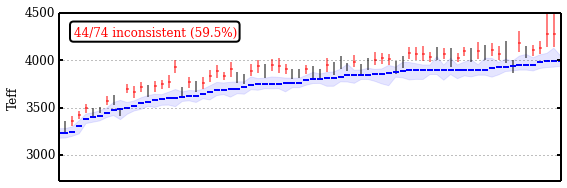

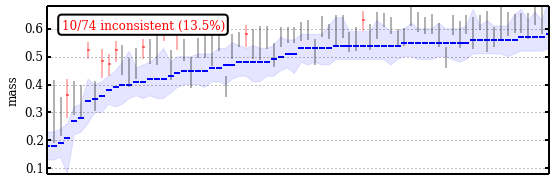

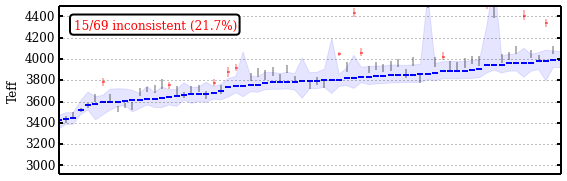

In [10]:
mpld3.enable_notebook()
huber_compare(query='teff < 4000 and teff_prov=="PHO2"', prop='Teff', lw=2);
huber_compare(query='teff < 4000 and teff_prov=="PHO2"', prop='mass', lw=2);
huber_compare(query='teff < 4000 and (teff_prov=="SPE5" or teff_prov=="SPE60")', prop='Teff', lw=2);
#huber_compare(query='teff < 4000 and teff_prov=="PHO54"', prop='Teff', lw=2)

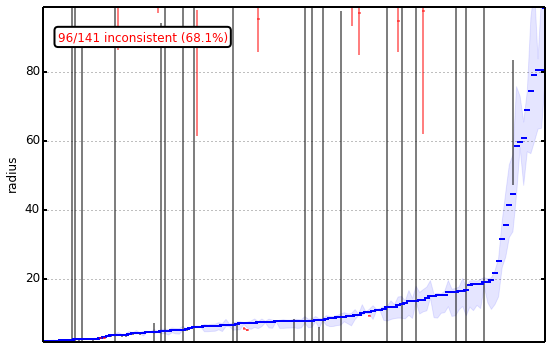

In [33]:
huber_compare(query='radius > 2 and logg_prov in ["AST8", "AST9", "AST10", "AST11", "AST54", "AST55", "AST56"]', prop='radius')

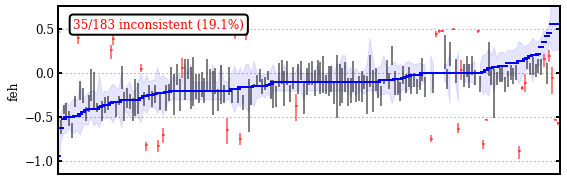

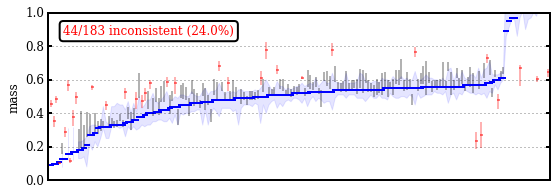

In [88]:
huber_compare(query='teff < 4000', prop='feh', lw=2)
ax = huber_compare(query='teff < 4000', prop='mass', lw=2, ylim=(0,1))

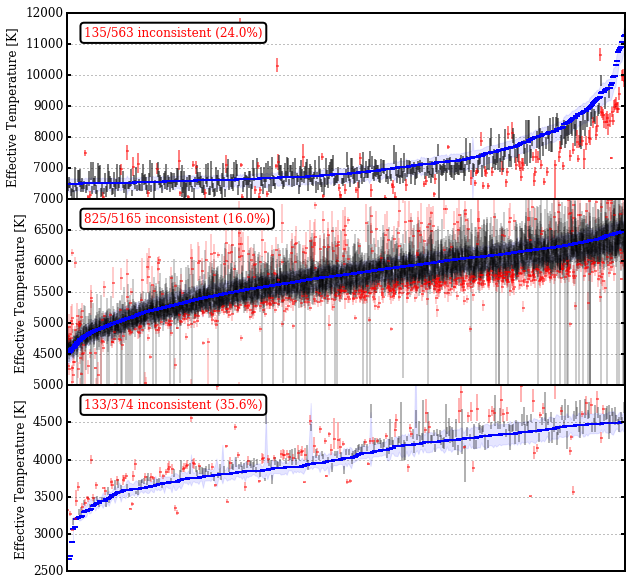

In [108]:
plt.close('all')
def teff_compare_plots():
    fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(10,10))
    huber_compare(query='teff > 6500', ax=ax1, lw=1, alpha_lines=0.3)
    ax1.set_yticks(ax1.get_yticks()[1:])
    ax1.set_ylabel('Effective Temperature [K]', fontsize=12)
    huber_compare(query='4500 < teff <= 6500', ax=ax2, alpha_lines=0.2)
    ax2.set_yticks(ax2.get_yticks()[1:])
    ax2.set_ylabel('Effective Temperature [K]', fontsize=12)
    huber_compare(query='teff <= 4500', ax=ax3, lw=1, alpha_lines=0.3)
    ax3.set_ylim(ymin=2500)
    ax3.set_ylabel('Effective Temperature [K]', fontsize=12)
    plt.subplots_adjust(hspace=0)
    plt.savefig('document/figures/hubercompare_teff.pdf')
    return fig

fig = teff_compare_plots();

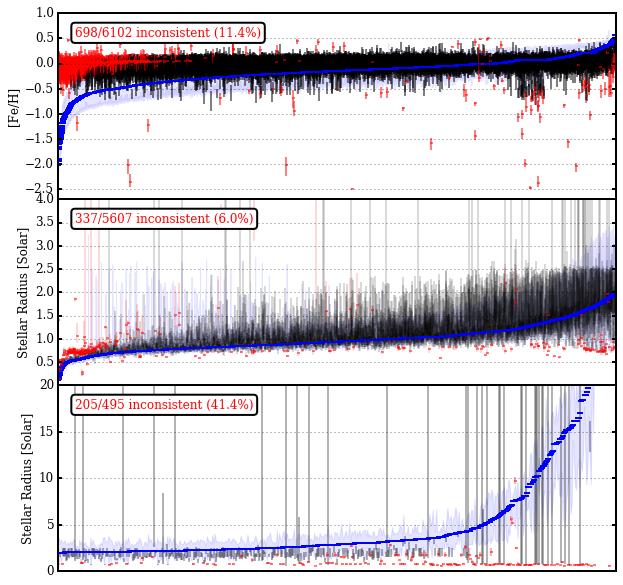

In [110]:
def feh_radius_compare():
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10,10))
    huber_compare(prop='feh', ax=ax1, alpha_lines=0.1)
    ax1.set_yticks(ax1.get_yticks()[1:])
    ax1.set_ylabel('[Fe/H]', fontsize=12)
    huber_compare(prop='radius', query='radius <= 2', ylim=(0,4), ax=ax2, alpha_lines=0.15);
    ax2.set_yticks(ax2.get_yticks()[1:])
    ax2.set_ylabel('Stellar Radius [Solar]', fontsize=12)
    huber_compare(prop='radius', query='2 < radius', ylim=(0,20), lw=1, ax=ax3)
    ax3.set_ylabel('Stellar Radius [Solar]', fontsize=12)
    plt.subplots_adjust(hspace=0)
    plt.savefig('document/figures/hubercompare_fehradius.pdf')
    
feh_radius_compare()

In [96]:
plt.subplots_adjust?

In [11]:
print(fpp_all.columns)
print(sp.columns)

Index([u'koi.1', u'rprs', u'secthresh', u'maxrad', u'pr_heb', u'pr_eb',
       u'pr_beb', u'L_tot', u'fp', u'FPP', u'kepid', u'period', u'rp',
       u'disposition', u'prob_ontarget', u'pos_prob_score', u'not_transitlike',
       u'significant_secondary', u'centroid_offset', u'ephem_match',
       u'exception'],
      dtype='object')
Index([u'koi', u'mass', u'mass_lo', u'mass_hi', u'radius', u'radius_lo',
       u'radius_hi', u'Teff', u'Teff_lo', u'Teff_hi', u'logg', u'logg_lo',
       u'logg_hi', u'feh', u'feh_lo', u'feh_hi', u'age', u'age_lo', u'age_hi',
       u'distance', u'distance_lo', u'distance_hi', u'AV', u'AV_lo', u'AV_hi',
       u'maxAV', u'Teff_prior_mu', u'Teff_prior_sig', u'logg_prior_mu',
       u'logg_prior_sig', u'feh_prior_mu', u'feh_prior_sig'],
      dtype='object')


In [44]:
fpp_all.groupby('exception').count()

,koi.1,rprs,secthresh,maxrad,pr_heb,pr_eb,pr_beb,L_tot,fp,FPP,kepid,period,rp,disposition,prob_ontarget,pos_prob_score,not_transitlike,significant_secondary,centroid_offset,ephem_match
exception,,,,,,,,,,,,,,,,,,,,
AllWithinRocheError,38,38,38,38,0,0,0,0,0,0,38,38,37,38,28,36,38,38,38,38
BadRoweFitError,210,0,0,0,0,0,0,0,0,0,210,210,0,210,131,166,210,210,210,210
EmptyPhotometryError,38,0,0,0,0,0,0,0,0,0,38,38,0,38,20,23,38,38,38,38
EmptyPopulationError,17,17,17,17,0,0,0,0,0,0,17,17,17,17,0,17,17,17,17,17
MCMCError,18,18,18,18,0,0,0,0,0,0,18,18,18,18,8,9,18,18,18,18
MissingKOIError,971,0,0,0,0,0,0,0,0,0,971,971,0,971,380,432,971,971,971,971
MissingStellarError,80,80,80,80,0,0,0,0,0,0,80,80,0,80,36,73,80,80,80,80
NoWeakSecondaryError,82,0,0,0,0,0,0,0,0,0,82,82,0,82,4,8,82,82,82,82
ValueError,1,1,1,1,0,0,0,0,0,0,1,1,0,1,1,1,1,1,1,1


In [112]:
starprops = pd.read_table('data/starprops_all.txt', delim_whitespace=True)
starprops['koistar'] = starprops['koi'].apply(ku.koistar)

sp = starprops.groupby('koistar').first()


def write_nexsci_table():
    filename = 'nexsci_fpp.csv'
    
    column_names = {'koi.1':'kepoi_name', 'kepid':'kepid',
                   'Teff':'fpp_steff', 'logg':'fpp_slogg',
                   'feh':'fpp_smet', 'radius':'fpp_srad',
                   'mass':'fpp_smass', 'age':'fpp_sage',
                   'distance':'fpp_dist', 'AV':'fpp_av',
                   'maxAV':'fpp_max_av', 'period':'fpp_koi_period',
                   'Teff_prior_mu':'fpp_pr_steff_mu', 'Teff_prior_sig':'fpp_pr_steff_sig',
                   'logg_prior_mu':'fpp_pr_slogg_mu', 'logg_prior_sig':'fpp_pr_slogg_sig',
                   'feh_prior_mu':'fpp_pr_smet_mu', 'feh_prior_sig':'fpp_pr_smet_sig',
                   'rprs':'fpp_ror', 'rp':'fpp_prad', 'secthresh':'fpp_secthresh',
                   'maxrad':'fpp_maxrad', 'pr_heb':'fpp_prob_heb',
                   'pr_eb':'fpp_prob_ueb', 'pr_beb':'fpp_prob_beb',
                   'fp':'fpp_spec_occrate', 'FPP':'fpp_prob', 'L_tot':'fpp_score',
                   'exception':'fpp_fail_reason',
                   'pr_eb_Px2':'fpp_prob_ueb_dbl',
                   'pr_heb_Px2':'fpp_prob_heb_dbl',
                   'pr_beb_Px2':'fpp_prob_beb_dbl'}
    
    has_error = ['Teff', 'logg', 'feh', 'radius', 'mass', 'age', 'distance', 'AV']
    
    star_columns = ['Teff', 'logg', 'feh', 'radius', 'mass', 'age', 'distance',
                   'AV', 'maxAV', 'Teff_prior_mu', 'Teff_prior_sig',
                   'logg_prior_mu', 'logg_prior_sig', 'feh_prior_mu', 'feh_prior_sig']
    fpp_columns = ['koi.1', 'kepid', 'period', 'rprs', 'rp', 'secthresh', 'maxrad', 
                   'pr_heb', 'pr_eb', 'pr_beb', 'pr_heb_Px2', 
                   'pr_eb_Px2', 'pr_beb_Px2',
                   'fp', 'FPP', 'L_tot', 'exception']  

    # Failure classes:
    #  1:  No MCMC modeling from JRowe (MissingKOIError, EmptyPhotometryError)
    #  2:  Bad MCMC model from JRowe (BadRoweFitError)
    #  3:  No stellar params from Huber table (MissingStellarError)
    #  4:  No weak secondary data (NoWeakSecondaryError)
    #  5:  MCMC trapezoid fit did not converge (MCMCError)
    #  6:  Period too short for implied star (AllWithinRocheError)
    #  7:  Other (EmptyPopulationError, ValueError, ZeroDivisionError)
    exceptions = {'AllWithinRocheError': 'UnphysicalPeriod',
                 'BadRoweFitError': 'UnphysicalMCMC',
                 'EmptyPhotometryError': 'NoMCMC',
                 'EmptyPopulationError': 'Other',
                 'MCMCError': 'TrapMCMCNotConverged',
                  'NoFitError': 'TrapMCMCNotConverged',
                 'MissingKOIError': 'NoMCMC',
                 'MissingStellarError': 'NoStellar',
                 'NoWeakSecondaryError': 'NoSeconary',
                 'ValueError': 'Other',
                 'ZeroDivisionError': 'Other'}
    
    formats = {'koi.1':'{:s}',
            'disposition':'{:s}',
            'period':'{:.3f}',
            'rp':'{:.2f}',
            'rprs':'{:.3f}',
            'secthresh':'{:.0f}',
            'maxrad':'{:.2f}',
            'pr_heb':'{:.2g}',
            'pr_eb':'{:.2g}',
            'pr_beb':'{:.2g}',
            'pr_heb_Px2':'{:.2g}',
            'pr_eb_Px2':'{:.2g}',
            'pr_beb_Px2':'{:.2g}',
            'L_tot':'{:.2g}',
            'fp':'{:.3f}',
             'FPP':'{:.2g}',
             'kepid':'{:.0f}',
         'prob_ontarget':'{:.2f}',
         'pos_prob_score':'{:.2f}',
         'exception':'{}',
            'mass':'{:.2f}',
           'radius':'{:.2f}',
           'Teff': '{:.0f}',
           'logg': '{:.2f}',
           'feh': '{:.2f}',
           'age': '{:.2f}',
           'distance': '{:.0f}',
           'AV' : '{:.2f}',
            'maxAV':'{:.2f}',
            'Teff_prior_mu':'{:.0f}', 'Teff_prior_sig':'{:.0f}',
            'logg_prior_mu':'{:.2f}', 'logg_prior_sig':'{:.2f}',
            'feh_prior_mu':'{:.2f}', 'feh_prior_sig':'{:.2f}'}

    
    columns = fpp_columns + star_columns
    
    fout = open(filename, 'w')
    line = ''
    for c in columns:
        cn = column_names[c]
        line += '{},'.format(cn)
        if c in has_error:
            line += '{0}_err1,{0}_err2,'.format(cn)
    line = line[:-1]
    line += '\n'
    fout.write(line)
    
    for k in fpp_all.index:
        line = ''
        koistar = ku.koistar(k)
        for c in columns:
            fmt = formats[c]
            if c in fpp_columns:
                if c=='exception':
                    try:
                        val = exceptions[fpp_all.ix[k,c]]
                    except KeyError:
                        val = ''
                else:
                    val = fpp_all.ix[k, c]
            else:
                if koistar in sp.index:
                    val = sp.ix[koistar, c]
                else:
                    val = np.nan
                
            line += '{},'.format(fmt).format(val)

            if c in has_error:
                if koistar in sp.index:
                    err1 = sp.ix[koistar, '{}_hi'.format(c)] - val
                    err2 = sp.ix[koistar, '{}_lo'.format(c)] - val
                else:
                    err1, err2 = np.nan, np.nan
                    
                line += '{},{},'.format(err1,err2)

        line = line[:-1]
        line += '\n'
        fout.write(line)
        
    fout.close()
        
write_nexsci_table()

In [113]:
nexsci = pd.read_csv('nexsci_fpp.csv')
nexsci.count()

kepoi_name          7470
kepid               7470
fpp_koi_period      7470
fpp_ror             7202
fpp_prad            7128
fpp_secthresh       7202
fpp_maxrad          7202
fpp_prob_heb        7026
fpp_prob_ueb        7026
fpp_prob_beb        7026
fpp_prob_heb_dbl    7026
fpp_prob_ueb_dbl    7026
fpp_prob_beb_dbl    7026
fpp_spec_occrate    7049
fpp_prob            7026
fpp_score           7049
fpp_fail_reason      415
fpp_steff           7154
fpp_steff_err1      7154
fpp_steff_err2      7154
fpp_slogg           7154
fpp_slogg_err1      7154
fpp_slogg_err2      7154
fpp_smet            7154
fpp_smet_err1       7154
fpp_smet_err2       7154
fpp_srad            7154
fpp_srad_err1       7154
fpp_srad_err2       7154
fpp_smass           7154
fpp_smass_err1      7154
fpp_smass_err2      7154
fpp_sage            7154
fpp_sage_err1       7154
fpp_sage_err2       7154
fpp_dist            7154
fpp_dist_err1       7154
fpp_dist_err2       7154
fpp_av              7154
fpp_av_err1         7154


In [30]:
!head nexsci.all.20141111.dat

KOI | KID | Kepmag | T0   | T0err | P    | Perr | adrs | adrserr | rdr | rdrerr | rdrerr1 | rdrerr2 |   Rp   | Rperr  | Rperr1 | Rperr2 | b | berr | berr1 | berr2 | incl | tdur | tdurerr | teff | tefferr | tefferr1 | tefferr2 | logg | loggerr | loggerr1 | loggerr2 | Mstar | Mstarerr | Mstarerr1 | Mstarerr2 | Rstar | Rstarerr | Rstarerr1 | Rstarerr2 | Age | Ageerr | asemi | Teq | Tdepth | Tdeptherr | SN | RA | DEC | limb1 | limb2 | limb3 | limb4 | rhostar | rhostarerr1 | rhostarerr2 | Srad   | Sraderr1 | Sraderr2
    |     |        | BKJD | BKJD  | days | days |      |         |     |        |         |         | Rearth | Rearth | Rearth | Rearth |   |      |       |       | deg  | hour |  hour   |  K   |    K    |     K    |    K     | cgs  |   cgs   |   cgs    |    cgs   | MSun  |   Msun   |   Msun    |   Msun    | Rsun  |   Rsun   |   Rsun    |   Rsun    | Gyr |  Gyr   |  AU   |  K  |  ppm   |    ppm    |    |    |     |       |       |       |       |  gcc    |     gcc     |     gcc

In [2]:
#nexsci_old = pd.read_table('nexsci.all.20141111.dat', delimiter='|')
#nexsci_new = pd.read_table('nexsci.20150814.txt', delimiter='|')

nexsci = pd.concat([pd.read_table('nexsci.all.20141111.dat', delimiter='|'),
                    pd.read_table('nexsci.20150814.txt', delimiter='|')])

from keputils.koiutils import koiname

nexsci.index = nexsci.KOI.apply(koiname)

nexsci = nexsci.groupby(level=0).last()

nexsci.to_csv('jrowe_mcmc_fits.csv')

In [5]:
jrowe = pd.read_csv('jrowe_mcmc_fits.csv', index_col=0)

In [6]:
jrowe.head()

,KOI.1,KID,Kepmag,T0,T0err,P,Perr,adrs,adrserr,rdr,...,limb1,limb2,limb3,limb4,rhostar,rhostarerr1,rhostarerr2,Srad,Sraderr1,Sraderr2
KOI,,,,,,,,,,,,,,,,,,,,,
K00001.01,1.01,11446443,9.846,122.763301,0.000006,2.470613,1.900000e-08,8.392156,0.03134,0.123851,...,0.3731,0.2779,0,0,1.83176,0.00684,-0.00441,772.22,60.74,-57.15
K00002.01,2.01,10666592,9.334,121.358572,0.000014,2.204735,3.800000e-08,4.707268,0.00070,0.075408,...,0.3197,0.3090,0,0,0.40593,0.00006,-0.00027,3973.70,279.95,-264.48
K00003.01,3.01,10748390,7.009,124.813141,0.000028,4.887803,1.770000e-07,16.718360,0.05146,0.057989,...,0.6405,0.1019,0,0,3.70008,0.01139,-0.02911,97.10,16.17,-12.29
K00004.01,4.01,3861595,10.195,157.526738,0.000269,3.849372,1.304000e-06,5.463808,0.65674,0.040105,...,0.3150,0.3029,0,0,0.20824,0.02503,-0.02017,4055.29,1837.19,-1919.87
K00005.01,5.01,8554498,10.212,132.974137,0.000152,4.780328,8.760000e-07,7.463953,0.37837,0.037065,...,0.3992,0.2653,0,0,0.34423,0.01745,-0.01355,898.71,93.85,-86.47


In [77]:
len(nexsci)

8842

In [81]:
nexsci.head()

,KOI,KID,Kepmag,T0,T0err,P,Perr,adrs,adrserr,rdr,...,limb1,limb2,limb3,limb4,rhostar,rhostarerr1,rhostarerr2,Srad,Sraderr1,Sraderr2
KOI,,,,,,,,,,,,,,,,,,,,,
K00001.01,1.01,11446443,9.846,122.763301,0.000006,2.470613,1.900000e-08,8.392156,0.03134,0.123851,...,0.3731,0.2779,0,0,1.83176,0.00684,-0.00441,772.22,60.74,-57.15
K00002.01,2.01,10666592,9.334,121.358572,0.000014,2.204735,3.800000e-08,4.707268,0.00070,0.075408,...,0.3197,0.3090,0,0,0.40593,0.00006,-0.00027,3973.70,279.95,-264.48
K00003.01,3.01,10748390,7.009,124.813141,0.000028,4.887803,1.770000e-07,16.718360,0.05146,0.057989,...,0.6405,0.1019,0,0,3.70008,0.01139,-0.02911,97.10,16.17,-12.29
K00004.01,4.01,3861595,10.195,157.526738,0.000269,3.849372,1.304000e-06,5.463808,0.65674,0.040105,...,0.3150,0.3029,0,0,0.20824,0.02503,-0.02017,4055.29,1837.19,-1919.87
K00005.01,5.01,8554498,10.212,132.974137,0.000152,4.780328,8.760000e-07,7.463953,0.37837,0.037065,...,0.3992,0.2653,0,0,0.34423,0.01745,-0.01355,898.71,93.85,-86.47


In [63]:
fpp_all.columns

Index([u'koi.1', u'rprs', u'secthresh', u'maxrad', u'pr_heb', u'pr_eb',
       u'pr_beb', u'L_tot', u'fp', u'FPP', u'kepid', u'period', u'rp',
       u'disposition', u'prob_ontarget', u'pos_prob_score', u'not_transitlike',
       u'significant_secondary', u'centroid_offset', u'ephem_match',
       u'exception'],
      dtype='object')

In [80]:
nexsci.columns

Index([u'KOI', u'KID', u'Kepmag', u'T0', u'T0err', u'P', u'Perr', u'adrs',
       u'adrserr', u'rdr', u'rdrerr', u'rdrerr1', u'rdrerr2', u'Rp', u'Rperr',
       u'Rperr1', u'Rperr2', u'b', u'berr', u'berr1', u'berr2', u'incl',
       u'tdur', u'tdurerr', u'teff', u'tefferr', u'tefferr1', u'tefferr2',
       u'logg', u'loggerr', u'loggerr1', u'loggerr2', u'Mstar', u'Mstarerr',
       u'Mstarerr1', u'Mstarerr2', u'Rstar', u'Rstarerr', u'Rstarerr1',
       u'Rstarerr2', u'Age', u'Ageerr', u'asemi', u'Teq', u'Tdepth',
       u'Tdeptherr', u'SN', u'RA', u'DEC', u'limb1', u'limb2', u'limb3',
       u'limb4', u'rhostar', u'rhostarerr1', u'rhostarerr2', u'Srad',
       u'Sraderr1', u'Sraderr2'],
      dtype='object')

In [116]:
fpp_all['diff_period'] = fpp_all['period'] - nexsci.ix[fpp_all.index,'P']
fpp_all['diff_rprs'] = fpp_all['rprs'] - nexsci.ix[fpp_all.index,'rdr']
fpp_all['period_matches'] = np.isclose(fpp_all['period'], nexsci.ix[fpp_all.index,'P'], rtol=1e-2)
fpp_all['rprs_matches'] = np.isclose(fpp_all['rprs'], nexsci.ix[fpp_all.index,'rdr'], atol=0.005)


In [115]:
nexsci.ix['K00019.01','rdr']

0.22483800000000001

In [117]:
fpp_all.query('not rprs_matches')[['rprs','diff_rprs','FPP','disposition']]

,rprs,diff_rprs,FPP,disposition
koi,,,,
K00005.02,NaN,NaN,NaN,CANDIDATE
K00006.01,0.226,-0.068016,1.000000e+00,FALSE POSITIVE
K00011.01,0.088,-0.028023,1.000000e+00,FALSE POSITIVE
K00015.01,0.324,-0.124678,9.990000e-01,FALSE POSITIVE
K00016.01,0.305,0.270206,1.000000e+00,FALSE POSITIVE
K00019.01,0.083,-0.141838,2.790000e-01,FALSE POSITIVE
K00021.01,0.173,-0.080382,9.690000e-01,FALSE POSITIVE
K00026.01,0.145,0.063211,9.930000e-01,FALSE POSITIVE
K00043.01,NaN,NaN,NaN,FALSE POSITIVE


In [95]:
fpp_all[['period_matches','diff_period','rprs_matches','rprs','diff_rprs']]

,period_matches,diff_period,rprs_matches,rprs,diff_rprs
koi,,,,,
K00001.01,True,0.000000e+00,True,0.124,0.000149
K00002.01,True,0.000000e+00,True,0.075,-0.000408
K00003.01,True,0.000000e+00,True,0.058,0.000011
K00004.01,True,0.000000e+00,True,0.040,-0.000105
K00005.01,True,0.000000e+00,True,0.037,-0.000065
K00005.02,True,-3.630000e-06,False,NaN,NaN
K00006.01,True,0.000000e+00,False,0.226,-0.068016
K00007.01,True,0.000000e+00,True,0.025,0.000265
K00008.01,True,0.000000e+00,True,0.019,0.000441


In [7]:
fpp_all.columns

Index([u'koi.1', u'rprs', u'secthresh', u'maxrad', u'pr_heb', u'pr_eb',
       u'pr_beb', u'L_tot', u'fp', u'FPP', u'kepid', u'period', u'rp',
       u'disposition', u'prob_ontarget', u'pos_prob_score', u'not_transitlike',
       u'significant_secondary', u'centroid_offset', u'ephem_match',
       u'exception', u'has_ttv'],
      dtype='object')

3682
1976
1049


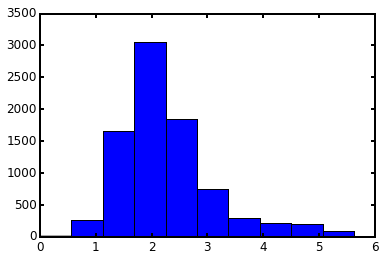

In [24]:
ok = np.isfinite(fpp_all['secthresh']) & (fpp_all['secthresh'] > 0)
plt.hist(np.log10(fpp_all[ok]['secthresh']))
print (fpp_all[ok]['secthresh'] < 100).sum()
print (fpp_all[ok]['secthresh'] < 50).sum()
print (fpp_all[ok]['secthresh'] < 30).sum()


11.06


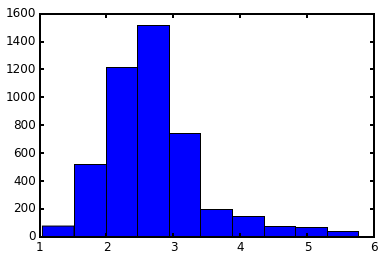

In [21]:
from keputils import koiutils as ku
ok = (ku.DATA['koi_depth'] > 10) & (ku.DATA['koi_disposition'] != 'FALSE POSITIVE')
print(ku.DATA[ok]['koi_depth'].min())
plt.hist(np.log10(ku.DATA[ok]['koi_depth']));

In [27]:
koilist = ['K00571.05', 'K01422.04', 'K01422.05', 'K02529.02', 'K03255.01', 
           'K03284.01', 'K04005.01', 'K04087.01', 'K04427.01', 'K04622.01', 
           'K04742.01', 'K04745.01']

fpp_all.ix[koilist, ['L_tot', 'prob_ontarget', 'FPP', 'exception']]

,L_tot,prob_ontarget,FPP,exception
koi,,,,
K00571.05,2.609,1.00,0.230000,NaN
K01422.04,3.560,1.00,0.000048,NaN
K01422.05,6.518,1.00,0.067100,NaN
K02529.02,NaN,1.00,NaN,BadRoweFitError
K03255.01,19.100,1.00,0.000077,NaN
K03284.01,9.026,0.86,0.014000,NaN
K04005.01,5.110,1.00,0.000038,NaN
K04087.01,0.516,1.00,0.000083,NaN
K04427.01,1.814,1.00,0.040800,NaN


In [21]:
import os.path
agol_list = os.path.expanduser('/u/tdm/Downloads/morton_list.txt')

agol_kics = np.loadtxt(agol_list,dtype=int)

In [25]:
agol_kois = []
for k in agol_kics:
    agol_kois.append(ku.DATA.kepoi_name.values[(ku.DATA.kepid==k).values])
agol_kois = np.concatenate(agol_kois)

In [26]:
agol_kois

array(['K05073.01', 'K01206.01', 'K00771.01', 'K01032.01', 'K00375.01',
       'K01463.01', 'K00682.01', 'K00371.01', 'K00371.02', 'K01431.01',
       'K01174.01', 'K01375.01', 'K01411.01', 'K05073.01', 'K05477.01',
       'K05550.01', 'K05241.01', 'K01268.01', 'K00868.01', 'K02679.01',
       'K01486.01', 'K01486.02', 'K02674.01', 'K02674.02', 'K02674.03',
       'K03783.01', 'K01772.01', 'K00865.01', 'K01466.01', 'K03726.01',
       'K03711.01', 'K00998.01', 'K01226.01', 'K01242.01', 'K01257.01',
       'K05711.01', 'K00366.01', 'K00686.01', 'K00398.01', 'K00398.02',
       'K00398.03'], dtype=object)

In [30]:
fpp_all.ix[agol_kois,['rprs','L_tot','FPP','period']].sort('FPP').to_csv('agol_kois.csv')

In [14]:
from keputils import koiutils as ku
for c in ku.DR24.columns:
    print c

kepid
kepoi_name
kepler_name
ra
ra_err
ra_str
dec
dec_err
dec_str
koi_gmag
koi_gmag_err
koi_rmag
koi_rmag_err
koi_imag
koi_imag_err
koi_zmag
koi_zmag_err
koi_jmag
koi_jmag_err
koi_hmag
koi_hmag_err
koi_kmag
koi_kmag_err
koi_kepmag
koi_kepmag_err
koi_delivname
koi_vet_stat
koi_quarters
koi_disposition
koi_pdisposition
koi_count
koi_num_transits
koi_max_sngle_ev
koi_max_mult_ev
koi_bin_oedp_sig
koi_limbdark_mod
koi_ldm_coeff4
koi_ldm_coeff3
koi_ldm_coeff2
koi_ldm_coeff1
koi_trans_mod
koi_model_snr
koi_model_dof
koi_model_chisq
koi_time0bk
koi_time0bk_err1
koi_time0bk_err2
koi_eccen
koi_eccen_err1
koi_eccen_err2
koi_longp
koi_longp_err1
koi_longp_err2
koi_prad
koi_prad_err1
koi_prad_err2
koi_sma
koi_sma_err1
koi_sma_err2
koi_impact
koi_impact_err1
koi_impact_err2
koi_duration
koi_duration_err1
koi_duration_err2
koi_ingress
koi_ingress_err1
koi_ingress_err2
koi_depth
koi_depth_err1
koi_depth_err2
koi_period
koi_period_err1
koi_period_err2
koi_ror
koi_ror_err1
koi_ror_err2
koi_dor
koi_dor_e

In [15]:
ku.DR24.koi_disp_prov.unique()

array(['q1_q17_dr24_koi'], dtype=object)

In [3]:
fpp_all.query('period < 2 and disposition!="FALSE POSITIVE"')['FPP'].describe()

count    3.600000e+02
mean     3.196709e-01
std      4.283248e-01
min      5.230000e-09
25%      6.087500e-04
50%      2.370000e-02
75%      9.115000e-01
max      1.000000e+00
Name: FPP, dtype: float64

In [8]:
from keputils import koiutils as ku
ok = (np.isfinite(ku.DR24.koi_srho_err1/ku.DR24.koi_srho_err2))
(ku.DR24[ok].koi_srho_err1/ku.DR24[ok].koi_srho_err2).describe()

count      7340.000000
mean       -138.611127
std        7414.865033
min     -611332.489796
25%          -2.832753
50%          -0.915064
75%          -0.374843
max          -0.000000
dtype: float64

In [10]:
ku.DR24[ok][['koi_srho_err1','koi_srho_err2']].describe()

,koi_srho_err1,koi_srho_err2
count,7340.000000,7340.000000
mean,5.463703,-4.662725
std,36.951777,36.640675
min,0.000000,-700.173580
25%,0.027958,-0.960600
50%,0.219325,-0.185740
75%,1.057405,-0.018755
max,647.177920,-0.000010


In [13]:
ku.DR24.query('koi_pdisposition=="FALSE POSITIVE"').koi_fpflag_nt.sum()

411

In [14]:
len(ku.DR24.query('koi_pdisposition=="FALSE POSITIVE"'))

3177

In [94]:
fpp_all.ix['K06705.01']

koi.1                    K06705.01
rprs                         0.034
secthresh                       30
maxrad                         3.6
pr_heb                    1.49e-16
pr_heb_Px2                  0.0105
pr_eb                     0.000354
pr_eb_Px2                 1.43e-06
pr_beb                       0.863
pr_beb_Px2                   0.126
L_tot                        1.263
fp                            0.17
FPP                              1
kepid                      6423922
period                   0.9951438
rp                         1.74255
disposition              CANDIDATE
prob_ontarget                    1
pos_prob_score                0.18
not_transitlike              False
significant_secondary        False
centroid_offset              False
ephem_match                  False
MES                       14.34296
exception                      NaN
has_ttv                      False
n_cands                          1
Name: K06705.01, dtype: object

In [3]:
fpwg = pd.read_csv('fpwg.csv', comment='#')

In [4]:
fpwg.index = fpwg.kepoi_name

In [6]:
pems = fpwg.query('fpwg_disp_perep==1').kepoi_name

(980, 123, 29)
(26, 8)


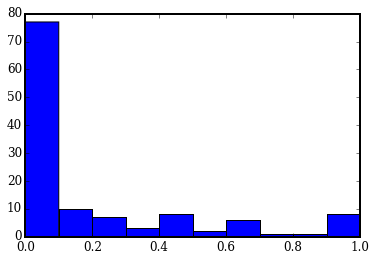

In [36]:
import matplotlib.pyplot as plt

pem = fpp_all.ephem_match #& ~(fpp_all.not_transitlike | fpp_all.centroid_offset | 
                          #       fpp_all.significant_secondary)
score_ok = fpp_all.pos_prob_score > 0.3
pos_ok = fpp_all.prob_ontarget > 0.99
ok = fpp_all.L_tot > 1e-3
lo_fpp = fpp_all.FPP < 0.01
plt.hist(fpp_all[pem & pos_ok].pos_prob_score)
print(sum(pem),sum(pem & pos_ok), sum(pem & pos_ok & score_ok))
print(sum(pem & pos_ok & score_ok & ok), sum(pem & pos_ok & score_ok & ok & lo_fpp))

In [41]:
sum(pem & (fpp_all.prob_ontarget==0))

673

In [39]:
for k in fpp_all[pem & pos_ok]['koi.1']:
    print k

K00744.02
K01330.02
K01334.02
K01747.02
K02404.02
K03051.02
K03230.02
K03479.02
K03509.01
K03751.01
K04135.01
K04414.01
K04855.01
K04950.01
K05012.01
K05041.01
K05050.01
K05172.01
K05204.01
K05252.01
K05260.01
K05270.02
K05316.01
K05330.01
K05392.01
K05448.01
K05575.01
K05667.01
K05724.01
K05730.01
K05735.01
K05750.01
K05887.01
K06003.01
K06005.01
K06006.01
K06009.01
K06013.01
K06064.02
K06074.01
K06128.01
K06169.01
K06287.01
K06288.01
K06305.01
K06309.01
K06366.01
K06405.01
K06537.01
K06572.01
K06587.01
K06590.01
K06591.01
K06592.01
K06595.01
K06613.01
K06620.01
K06637.01
K06693.01
K06694.01
K06709.01
K06732.01
K06770.01
K06790.01
K06796.01
K06797.01
K06804.01
K06806.01
K06808.01
K06809.01
K06821.01
K06825.01
K06829.01
K06844.01
K06846.01
K06850.01
K06857.01
K06864.01
K06865.01
K06887.01
K06926.01
K06928.01
K06967.01
K06982.01
K07015.01
K07036.01
K07047.01
K07053.01
K07102.01
K07114.01
K07123.01
K07154.01
K07166.01
K07188.01
K07189.01
K07193.01
K07210.02
K07244.01
K07247.01
K07248.01


In [22]:
q = 'pos_prob_score > 0.3 and L_tot > 1e-3 and prob_ontarget > 0.99 and ephem_match==1'
q2 = 'ephem_match==1'
print len(fpp_all.query(q))
print len(fpp_all.query(q2))
fpp_all.query(q)[['FPP','pos_prob_score','period','L_tot']]

26
980


,FPP,pos_prob_score,period,L_tot
koi,,,,
K04414.01,0.001090,0.78,0.866345,2483.000000
K05252.01,0.001190,0.44,1.804548,460.500000
K05260.01,0.015700,0.67,1.559361,15.850000
K05270.02,0.000747,0.33,0.907818,825.600000
K05316.01,0.999000,0.44,1.106560,15.470000
K05392.01,1.000000,0.99,0.660628,0.017920
K05750.01,0.031100,0.33,12.713654,19.710000
K05887.01,1.000000,0.50,9.833716,0.001752
K06005.01,0.885000,0.56,12.425437,0.002375
